# Multinomial Logistic Regression
Multinomial Logistic Regression is an extension of logistic regression that is used for classification problems where the target variable has more than two classes. This method estimates the probabilities of the different classes using the softmax function.

Accuracy: 0.7333333333333333
Confusion Matrix:
 [[11  0  0]
 [ 0  8  5]
 [ 0  3  3]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.73      0.62      0.67        13
           2       0.38      0.50      0.43         6

    accuracy                           0.73        30
   macro avg       0.70      0.71      0.70        30
weighted avg       0.76      0.73      0.74        30



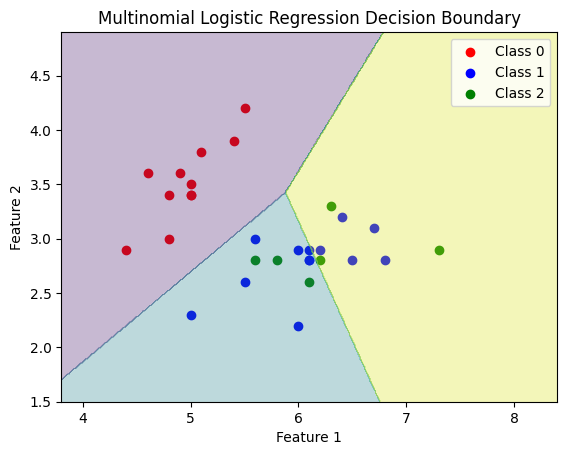

In [1]:
# Multinomial Logistic Regression Notebook

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the Iris dataset (3 classes)
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Multinomial Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualize the results (only first two features for 2D plot)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X_test[y_test == 2][:, 0], X_test[y_test == 2][:, 1], color='green', label='Class 2')

# Create a mesh grid for decision boundary visualization
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3)
plt.title('Multinomial Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Explanation of Code Components

1. **Data Loading**: The Iris dataset, which consists of three classes (Setosa, Versicolor, and Virginica), is loaded.

2. **Data Preprocessing**: The dataset is split into training and testing sets.

3. **Model Training**: A Multinomial Logistic Regression model is trained using the training data. The `solver` parameter is set to `'lbfgs'`, which is suitable for multinomial loss.

4. **Prediction**: Predictions are made on the test set.

5. **Model Evaluation**:
   - **Accuracy**: The proportion of correctly classified instances.
   - **Confusion Matrix**: A table that describes the performance of the classification model.
   - **Classification Report**: Includes precision, recall, and F1-score for each class.

6. **Visualization**: A scatter plot shows the actual class distribution in the test set. The decision boundary created by the Multinomial Logistic Regression model is visualized using contour plots. Note that the visualization uses only the first two features for simplicity.

### Note
You can use other datasets with more than two classes. This implementation can be adapted to handle various datasets and classes. Adjust the features used for visualization according to your data characteristics.